In [1]:
import pandas as pd
import os, re
import numpy as np
import filenames
%matplotlib inline

In [2]:
df3 = pd.read_csv(filenames.char_dfile, index_col='id')


def split_email(df):
    errors = []
    valid_tlds = ['com', 'edu', 'net', 'org', 'fm', np.nan, 'mn', 'fm', 'us']
    for idx in df.index:
        try:
            if len(df.loc[idx, 'email domain'].split('.')) == 2:
                df.loc[idx, 'email'] = df.loc[idx, 'email domain'].split('.')[0]
                df.loc[idx, 'tld'] = df.loc[idx, 'email domain'].split('.')[1]
            elif (len(df.loc[idx, 'email domain'].split('.'))) > 2:
                df.loc[idx, 'email'] = ' '.join([x for x in df.loc[idx, 'email domain'].split('.')[0:-1]])
                df.loc[idx, 'tld'] = df.loc[idx, 'email domain'].split('.')[-1]
#                print('Caught error @ idx:  {}, email: {} tld:  {}'.format(df.loc[idx, 'email domain'], df.loc[idx, 'email'], df.loc[idx, 'tld']))
#                input('')
            elif df.loc[idx, 'email domain'].endswith('com'):
                df.loc[idx, 'email'] = df.loc[idx, 'email domain'][:-3]
                df.loc[idx, 'tld'] = df.loc[idx, 'email domain'][-3:]
#                print('Converted {1} to {2} and {3}'.format(df.loc[idx, 'email domain'], df.loc[idx, 'email'], df.loc[idx, 'tld']))
#                input('')
            else:
                print('Error at:  ')
                errors.append(df.loc[idx, 'email domain'].tolist())
        except AttributeError:
            df.loc[idx, 'email'] = np.nan
            df.loc[idx, 'tld'] = np.nan
        except IndexError:
            print(df.loc[idx])
            input('')
    invalid_tlds = df[df['tld'].isin(valid_tlds) == False]
    for idx in invalid_tlds.index:
        temp_ = invalid_tlds.loc[idx, 'tld']
        if bool(re.search(r'\w[com]\w', temp_)) == True:
            df.loc[idx, 'tld'] = re.sub(r'\w[com]\w', 'com', temp_)
        elif bool(re.search(r'\w[net]+>', temp_)) == True:
            df.loc[idx, 'tld'] = re.sub(r'\w[net]+>', 'net', temp_)
        elif bool(re.search(r'\w[org]+>', temp_)) == True:
            df.loc[idx, 'tld'] = re.sub(r'\w[org]+>', 'org', temp_)
        else:
            print('No luck for {}'.format(idx))
        
#        invalid_tlds.loc[idx, 'tld'] = temp
#    for idx in invalid_tlds.index:
#        val = invalid_tlds.loc[idx, 'tld']
#        df.loc[idx, 'tld'] = val
#    print(invalid_tlds)
                
#    df.drop('email domain', axis=1, inplace=True)
    return df, errors

In [3]:
z, e = split_email(df3)

In [4]:
z['email'].value_counts()[-350:-300]

live                 10
mmm                  10
leoadaly             10
usfamily              9
usbank                9
ecolab                8
delta                 8
juno                  7
jostens               6
kpmg                  6
frontiernet           6
sbcglobal             6
thomsonreuters        6
att                   6
logicpd               5
travelers             5
uhc                   5
pearson               4
xcelenergy            4
embarqmail            4
cox                   4
carlson               4
uofmhabitat           4
stpaul                4
healthpartners        4
mnrealestateteam      4
andersencorp          4
assurant              3
usinternet            3
dorsey                3
minnesotalife         3
ampf                  3
grenergy              3
opus-group            3
new rr                3
stthomas              3
carval                3
clear                 2
bluecrossmn           2
usgo                  2
primetherapeutics     2
medtronic       

In [5]:
z.head()

,gender,age,email domain,is org contact?,persona,lifecycle stage,email,tld
id,,,,,,,,
10002589,female,NaN,stthomas.edu,no,NaN,other,stthomas,edu
10002626,male,NaN,umn.edu,NaN,NaN,lead,umn,edu
10008513,unknown,69.0,gmail.com,yes,NaN,other,gmail,com
10011462,unknown,55.0,comcast.net,NaN,NaN,other,comcast,net
10018977,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from pandas.tools.plotting import scatter_matrix

In [7]:
deciles_ = pd.qcut(z['age'], q=4)

In [8]:
deciles = pd.get_dummies(data=deciles_, dummy_na=True, prefix='age_bin')

In [9]:
deciles.head()

,"age_bin_[0, 41.25]","age_bin_(41.25, 54]","age_bin_(54, 61.75]","age_bin_(61.75, 106]",age_bin_nan
id,,,,,
10002589,0,0,0,0,1
10002626,0,0,0,0,1
10008513,0,0,0,1,0
10011462,0,0,1,0,0
10018977,0,0,0,0,1


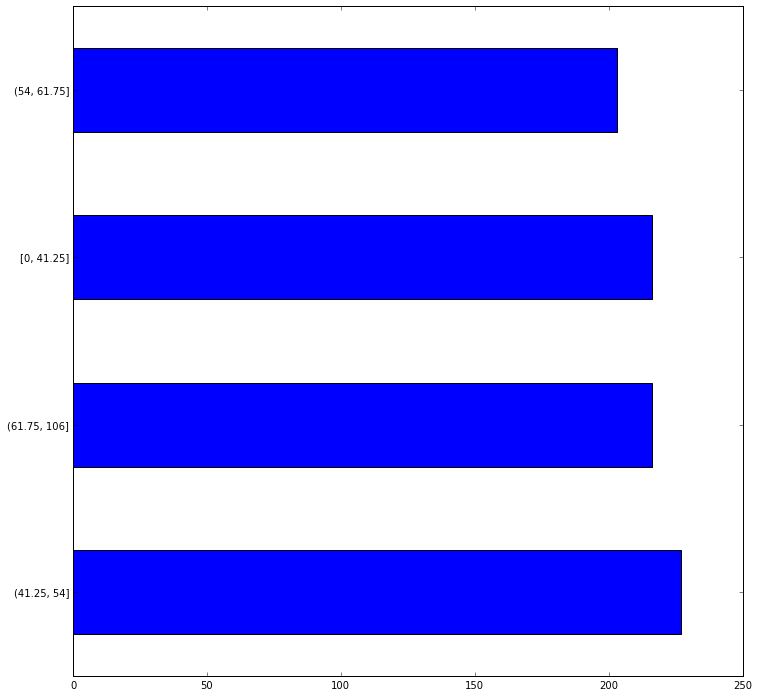

In [10]:
deciles_.value_counts().plot.barh(figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116e21ba8>]], dtype=object)

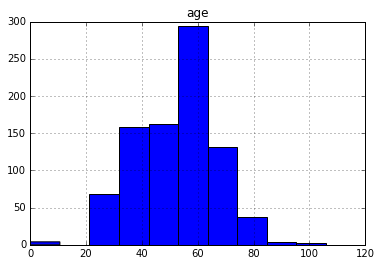

In [11]:
z.hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117c100b8>]], dtype=object)

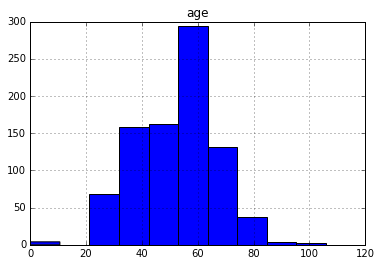

In [12]:
z.hist(column='age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117c45128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117eaab00>]], dtype=object)

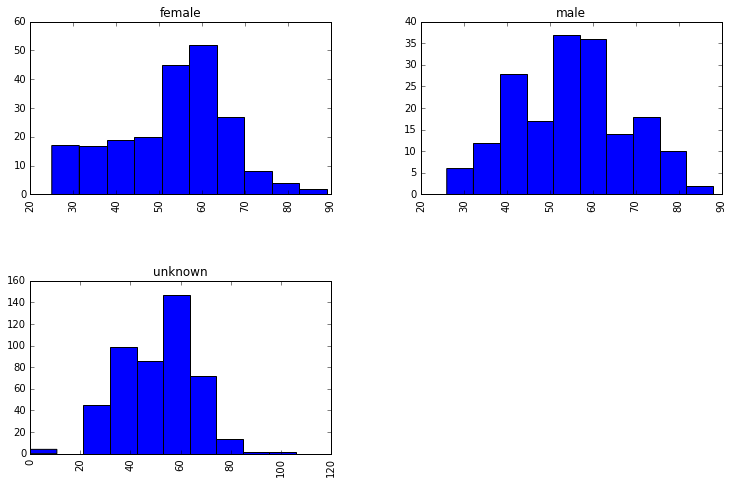

In [13]:
z['age'].hist(by=z['gender'], figsize=(12,8))

In [14]:
out_df = pd.merge(z, t1, left_index=True, right_index=True)

NameError: name 't1' is not defined

In [19]:
z.head()

,gender,age,email domain,is org contact?,persona,lifecycle stage,email,tld
id,,,,,,,,
10002589,female,NaN,stthomas.edu,no,NaN,other,stthomas,edu
10002626,male,NaN,umn.edu,NaN,NaN,lead,umn,edu
10008513,unknown,69.0,gmail.com,yes,NaN,other,gmail,com
10011462,unknown,55.0,comcast.net,NaN,NaN,other,comcast,net
10018977,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
out_df.head()

In [20]:
z['is org contact?'].value_counts()

no     488
yes     57
Name: is org contact?, dtype: int64

In [22]:
lifecycle_dummies = pd.get_dummies(data=z['lifecycle stage'], dummy_na=True)
email_categorical = pd.get_dummies(data=z['email'], prefix='email', dummy_na=True)
email_tld = pd.get_dummies(data=z['tld'], prefix='tld', dummy_na=True)
gender_categorical = pd.get_dummies(data=z['gender'], dummy_na=False)
org_contact = pd.get_dummies(data=z['is org contact?'], prefix='org_contact', dummy_na=False)

In [23]:
z.head()

,gender,age,email domain,is org contact?,persona,lifecycle stage,email,tld
id,,,,,,,,
10002589,female,NaN,stthomas.edu,no,NaN,other,stthomas,edu
10002626,male,NaN,umn.edu,NaN,NaN,lead,umn,edu
10008513,unknown,69.0,gmail.com,yes,NaN,other,gmail,com
10011462,unknown,55.0,comcast.net,NaN,NaN,other,comcast,net
10018977,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_final = z['age'].to_frame()

In [25]:
df_final.head()

,age
id,
10002589,NaN
10002626,NaN
10008513,69.0
10011462,55.0
10018977,NaN


In [26]:
dfs = [deciles, lifecycle_dummies, email_categorical, email_tld, gender_categorical, org_contact]

In [27]:
df_final = pd.DataFrame()
for df_ in dfs:
    if df_final.empty:
        df_final = df_
    else:
        df_final = pd.merge(df_final, df_, left_index=True, right_index=True)
    print(df_final.head())

          age_bin_[0, 41.25]  age_bin_(41.25, 54]  age_bin_(54, 61.75]  \
id                                                                       
10002589                   0                    0                    0   
10002626                   0                    0                    0   
10008513                   0                    0                    0   
10011462                   0                    0                    1   
10018977                   0                    0                    0   

          age_bin_(61.75, 106]  age_bin_nan  
id                                           
10002589                     0            1  
10002626                     0            1  
10008513                     1            0  
10011462                     0            0  
10018977                     0            1  
          age_bin_[0, 41.25]  age_bin_(41.25, 54]  age_bin_(54, 61.75]  \
id                                                                       
10002589   

In [28]:
df_final

,"age_bin_[0, 41.25]","age_bin_(41.25, 54]","age_bin_(54, 61.75]","age_bin_(61.75, 106]",age_bin_nan,customer,lead,opportunity,other,nan,...,tld_mn,tld_net,tld_org,tld_us,tld_nan,female,male,unknown,org_contact_no,org_contact_yes
id,,,,,,,,,,,,,,,,,,,,,
10002589,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
10002626,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10008513,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
10011462,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
10018977,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
10028499,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
10029916,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
10030611,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
10032089,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [29]:
df_final.columns.tolist()

['age_bin_[0, 41.25]',
 'age_bin_(41.25, 54]',
 'age_bin_(54, 61.75]',
 'age_bin_(61.75, 106]',
 'age_bin_nan',
 'customer',
 'lead',
 'opportunity',
 'other',
 nan,
 'email_abbott',
 'email_acosta',
 'email_aeroinc',
 'email_agio',
 'email_ail',
 'email_amec',
 'email_ampf',
 'email_amplatzer',
 'email_andersencorp',
 'email_annulrich',
 'email_anytimefitness',
 'email_aoblaw',
 'email_aol',
 'email_aon',
 'email_apigroupinc',
 'email_aproposstudio',
 'email_asme',
 'email_aspenresearch',
 'email_assurant',
 'email_astrionpartners',
 'email_asu',
 'email_atk',
 'email_att',
 'email_aveda',
 'email_barr',
 'email_bassford',
 'email_beckymeierhofer',
 'email_belindasells',
 'email_bellsouth',
 'email_bergquistcompany',
 'email_bestbuy',
 'email_bethel',
 'email_beusen',
 'email_bevcomm',
 'email_bhcsystems',
 'email_bitstream',
 'email_blackbaud',
 'email_bluecrossmn',
 'email_bobbrowncycles',
 'email_bonestroo',
 'email_bowmanandbrooke',
 'email_bremer',
 'email_bresnan',
 'email_buden

In [30]:
df_final.to_csv(filenames.personal)